# Hyperparameters Sensitivity Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
sim_path = '../../results/synth_classification_v3/28-08-2023-11:58'

In [3]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

In [4]:
alpha_dirs = get_immediate_subdirectories(sim_path)
alpha_dirs.sort()

In [5]:
run_dirs_for_alpha = {}
for alpha_dir in alpha_dirs:
    run_dirs_for_alpha[alpha_dir] = get_immediate_subdirectories(os.path.join(sim_path, alpha_dir))
    run_dirs_for_alpha[alpha_dir].sort()

In [7]:
ed_sampling_accuracy = {}
metadata = {}

STRATEGIES = ['EntropyDiversitySampling']

for alpha in alpha_dirs:
    simulation_path = os.path.join(sim_path, alpha)
    ed_sampling_accuracy[alpha] = {}
    for run in run_dirs_for_alpha[alpha]:
        with open(simulation_path + '/'+ run +'/metadata.json', 'r') as f:
            metadata[run] = json.load(f)
        
        run_path = os.path.join(simulation_path, run)
        ed_sampling_accuracy[alpha][run] = {}
        
        strategy_path = os.path.join(run_path, 'EntropyDiversitySampling')
        for n in range(metadata[run]['n_samples']):
            n_sample = n + 1
            sample_path = os.path.join(strategy_path, str(n_sample) + '_samples.csv')
            
            ed_sampling_accuracy[alpha][run][n_sample] = pd.read_csv(
                filepath_or_buffer=sample_path,
                dtype='str',
                header=None
            ).astype('float64').iloc[0, 0]

In [14]:
ed_accuracy = {}
for alpha in ed_sampling_accuracy.keys():
    ed_accuracy[alpha] = {}
    for run in ed_sampling_accuracy[alpha].keys():
        ed_accuracy[alpha][run] = []
        for n in ed_sampling_accuracy[alpha][run].keys():
            ed_accuracy[alpha][run].append(ed_sampling_accuracy[alpha][run][n])

In [20]:
ed_accuracy_mean = {}
for alpha in ed_accuracy.keys():
    ed_accuracy_mean[alpha] = np.mean(list(ed_accuracy[alpha].values()), axis=0)

In [26]:
ed_accuracy_std = {}
for alpha in ed_accuracy.keys():
    ed_accuracy_std[alpha] = np.std(list(ed_accuracy[alpha].values()), axis=0)  / np.sqrt(metadata['0']['test_set_size'])

## Plotting Results

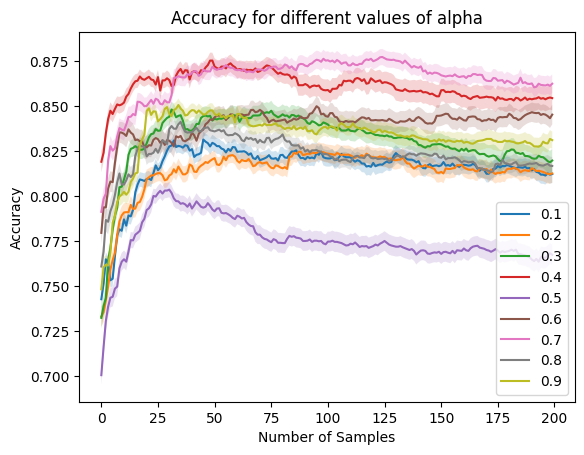

In [25]:
fig, ax = plt.subplots()

for alpha in alpha_dirs:
    ax.plot(range(len(ed_accuracy_mean[alpha])), ed_accuracy_mean[alpha], label=alpha)
    
    ax.fill_between(
        range(len(ed_accuracy_mean[alpha])),
        ed_accuracy_mean[alpha] - ed_accuracy_std[alpha],
        ed_accuracy_mean[alpha] + ed_accuracy_std[alpha],
        alpha=0.2
    )

ax.set_xlabel('Number of Samples')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for different values of alpha')
ax.legend()
plt.show()